## Training 7, 10 , 13 and Testing 16

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, concatenate, ReLU, AveragePooling2D


# Function to load data and labels
def load_data_and_labels(sector_number):
    
    base_path = f'/kaggle/input/sector{sector_number}'
    galaxy_folder = os.path.join(base_path, 'Augmented_Galaxy_Images', 'Augmented_Galaxy_Images')
    star_folder = os.path.join(base_path, 'Augmented_Star_Images', 'Augmented_Star_Images')
    
    # Adjust file names based on sector
    if sector_number == 16:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 10:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}_200.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}_200.csv')
    elif sector_number == 7:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 13:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'star_s{sector_number}.csv')

    # Load metadata from CSV files to ensure correct labeling
    galaxy_metadata = pd.read_csv(galaxy_csv, skiprows=1)
    star_metadata = pd.read_csv(star_csv, skiprows=1)

    images = []
    labels = []  # 0 for star, 1 for galaxy

    def extract_objid(filename):
        return filename.split('_')[-1].split('.')[0]

    for file in os.listdir(galaxy_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(galaxy_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(galaxy_folder, file))
                images.append(img)
                labels.append(1)

    for file in os.listdir(star_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(star_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(star_folder, file))
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load data from training sectors (7 and 10)
images7, labels7 = load_data_and_labels(7)
images10, labels10 = load_data_and_labels(10)
images13, labels13 = load_data_and_labels(13)

# Combine the data from the two training sectors
X_train = np.concatenate((images7, images10, images13))
y_train = np.concatenate((labels7, labels10, labels13))

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
inp_layer = tf.keras.Input(shape=X_train.shape[1:])

# Initial Convolutional Layer
mod = Conv2D(filters=64, kernel_size=(5, 5), padding='same')(inp_layer)
mod = ReLU()(mod)

# mod = AveragePooling2D(pool_size=(2, 2), strides=2)(mod)

c1 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c1 = ReLU()(c1)
c2 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c2 = ReLU()(c2)
c3 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c3 = ReLU()(c3)
c4 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(c1)
c4 = ReLU()(c4)
c5 = Conv2D(filters=64, kernel_size=(3,3), padding='same')(c1)
c5 = ReLU()(c5)
c6 = Conv2D(filters=64, kernel_size=(5,5), padding='same')(c2)
c6 = ReLU()(c6)
p1 = AveragePooling2D(pool_size=(1, 1))(c3)
mod = concatenate([c4,c5,c6,p1])

c7 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c7 = ReLU()(c7)
c8 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c8 = ReLU()(c8)
c9 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c9 = ReLU()(c9)
c10 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(c7)
c10 = ReLU()(c10)
c11 = Conv2D(filters=92, kernel_size=(3,3), padding='same')(c7)
c11 = ReLU()(c11)
c12 = Conv2D(filters=92, kernel_size=(5,5), padding='same')(c8)
c12 = ReLU()(c12)
p2 = AveragePooling2D(pool_size=(1, 1))(c9)
mod = concatenate([c10,c11,c12,p2])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c13 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c13 = ReLU()(c13)
c14 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c14 = ReLU()(c14)
c15 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c15 = ReLU()(c15)
c16 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c13)
c16 = ReLU()(c16)
c17 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c13)
c17 = ReLU()(c17)
c18 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c14)
c18 = ReLU()(c18)
p3 = AveragePooling2D(pool_size=(1, 1))(c15)
mod = concatenate([c16,c17,c18,p3])

c19 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c19 = ReLU()(c19)
c20 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c20 = ReLU()(c20)
c21 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c21 = ReLU()(c21)
c22 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c19)
c22 = ReLU()(c22)
c23 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c19)
c23 = ReLU()(c23)
c24 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c20)
c24 = ReLU()(c24)
p4 = AveragePooling2D(pool_size=(1, 1))(c21)
mod = concatenate([c22,c23,c24,p4])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c25 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c25 = ReLU()(c25)
c26 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c26 = ReLU()(c26)
c27 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(mod)
c27 = ReLU()(c27)
c28 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c25)
c28 = ReLU()(c28)
p5 = AveragePooling2D(pool_size=(1, 1))(c26)
mod = concatenate([c27,c28,p5])
# Flatten before feeding into Dense layers
mod = Flatten()(mod)

# Dense layers
mod = Dense(1024, activation='relu')(mod)
mod = Dense(1024, activation='relu')(mod)

# Output layer for binary classification
out_layer = Dense(1, activation="sigmoid")(mod)
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)

# Compile the model for binary classification
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()
# Ensure labels are in the correct shape for binary_crossentropy
y_train = y_train.flatten()
y_val = y_val.flatten()

# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Load test data from sector 16
X_test, y_test = load_data_and_labels(16)
y_test = y_test.flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 45, 45, 5)]          0         []                            
                                                                                                  
 conv2d_29 (Conv2D)          (None, 45, 45, 64)           8064      ['input_2[0][0]']             
                                                                                                  
 re_lu_29 (ReLU)             (None, 45, 45, 64)           0         ['conv2d_29[0][0]']           
                                                                                                  
 conv2d_30 (Conv2D)          (None, 45, 45, 48)           3120      ['re_lu_29[0][0]']            
                                                                                            

313/313 [==============================] - 7s 22ms/step


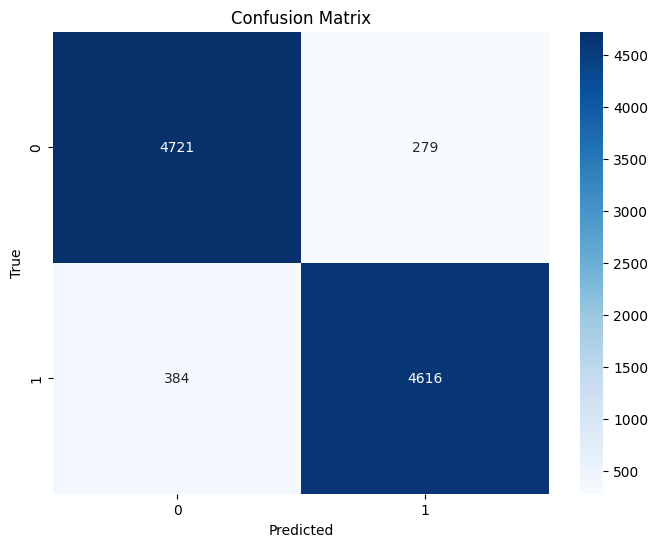

              precision    recall  f1-score   support

        Star       0.92      0.94      0.93      5000
      Galaxy       0.94      0.92      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Test Accuracy: 0.9337000250816345, Test Loss: 0.19436995685100555


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Star', 'Galaxy'])
print(report)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

## Training 10,13,16 Testing 7

In [6]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, concatenate, ReLU, AveragePooling2D


# Function to load data and labels
def load_data_and_labels(sector_number):
    
    base_path = f'/kaggle/input/sector{sector_number}'
    galaxy_folder = os.path.join(base_path, 'Augmented_Galaxy_Images', 'Augmented_Galaxy_Images')
    star_folder = os.path.join(base_path, 'Augmented_Star_Images', 'Augmented_Star_Images')
    
    # Adjust file names based on sector
    if sector_number == 16:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 10:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}_200.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}_200.csv')
    elif sector_number == 7:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 13:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'star_s{sector_number}.csv')

    # Load metadata from CSV files to ensure correct labeling
    galaxy_metadata = pd.read_csv(galaxy_csv, skiprows=1)
    star_metadata = pd.read_csv(star_csv, skiprows=1)

    images = []
    labels = []  # 0 for star, 1 for galaxy

    def extract_objid(filename):
        return filename.split('_')[-1].split('.')[0]

    for file in os.listdir(galaxy_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(galaxy_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(galaxy_folder, file))
                images.append(img)
                labels.append(1)

    for file in os.listdir(star_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(star_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(star_folder, file))
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load data from training sectors (7 and 10)
images16, labels16 = load_data_and_labels(16)
images10, labels10 = load_data_and_labels(10)
images13, labels13 = load_data_and_labels(13)

# Combine the data from the two training sectors
X_train = np.concatenate((images16, images10, images13))
y_train = np.concatenate((labels16, labels10, labels13))

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
inp_layer = tf.keras.Input(shape=X_train.shape[1:])

# Initial Convolutional Layer
mod = Conv2D(filters=64, kernel_size=(5, 5), padding='same')(inp_layer)
mod = ReLU()(mod)

# mod = AveragePooling2D(pool_size=(2, 2), strides=2)(mod)

c1 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c1 = ReLU()(c1)
c2 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c2 = ReLU()(c2)
c3 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c3 = ReLU()(c3)
c4 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(c1)
c4 = ReLU()(c4)
c5 = Conv2D(filters=64, kernel_size=(3,3), padding='same')(c1)
c5 = ReLU()(c5)
c6 = Conv2D(filters=64, kernel_size=(5,5), padding='same')(c2)
c6 = ReLU()(c6)
p1 = AveragePooling2D(pool_size=(1, 1))(c3)
mod = concatenate([c4,c5,c6,p1])

c7 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c7 = ReLU()(c7)
c8 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c8 = ReLU()(c8)
c9 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c9 = ReLU()(c9)
c10 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(c7)
c10 = ReLU()(c10)
c11 = Conv2D(filters=92, kernel_size=(3,3), padding='same')(c7)
c11 = ReLU()(c11)
c12 = Conv2D(filters=92, kernel_size=(5,5), padding='same')(c8)
c12 = ReLU()(c12)
p2 = AveragePooling2D(pool_size=(1, 1))(c9)
mod = concatenate([c10,c11,c12,p2])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c13 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c13 = ReLU()(c13)
c14 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c14 = ReLU()(c14)
c15 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c15 = ReLU()(c15)
c16 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c13)
c16 = ReLU()(c16)
c17 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c13)
c17 = ReLU()(c17)
c18 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c14)
c18 = ReLU()(c18)
p3 = AveragePooling2D(pool_size=(1, 1))(c15)
mod = concatenate([c16,c17,c18,p3])

c19 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c19 = ReLU()(c19)
c20 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c20 = ReLU()(c20)
c21 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c21 = ReLU()(c21)
c22 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c19)
c22 = ReLU()(c22)
c23 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c19)
c23 = ReLU()(c23)
c24 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c20)
c24 = ReLU()(c24)
p4 = AveragePooling2D(pool_size=(1, 1))(c21)
mod = concatenate([c22,c23,c24,p4])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c25 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c25 = ReLU()(c25)
c26 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c26 = ReLU()(c26)
c27 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(mod)
c27 = ReLU()(c27)
c28 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c25)
c28 = ReLU()(c28)
p5 = AveragePooling2D(pool_size=(1, 1))(c26)
mod = concatenate([c27,c28,p5])
# Flatten before feeding into Dense layers
mod = Flatten()(mod)

# Dense layers
mod = Dense(1024, activation='relu')(mod)
mod = Dense(1024, activation='relu')(mod)

# Output layer for binary classification
out_layer = Dense(1, activation="sigmoid")(mod)
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)

# Compile the model for binary classification
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()
# Ensure labels are in the correct shape for binary_crossentropy
y_train = y_train.flatten()
y_val = y_val.flatten()

# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Load test data from sector 16
X_test, y_test = load_data_and_labels(7)
y_test = y_test.flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 45, 45, 5)]          0         []                            
                                                                                                  
 conv2d_58 (Conv2D)          (None, 45, 45, 64)           8064      ['input_3[0][0]']             
                                                                                                  
 re_lu_58 (ReLU)             (None, 45, 45, 64)           0         ['conv2d_58[0][0]']           
                                                                                                  
 conv2d_59 (Conv2D)          (None, 45, 45, 48)           3120      ['re_lu_58[0][0]']            
                                                                                            

313/313 [==============================] - 7s 22ms/step


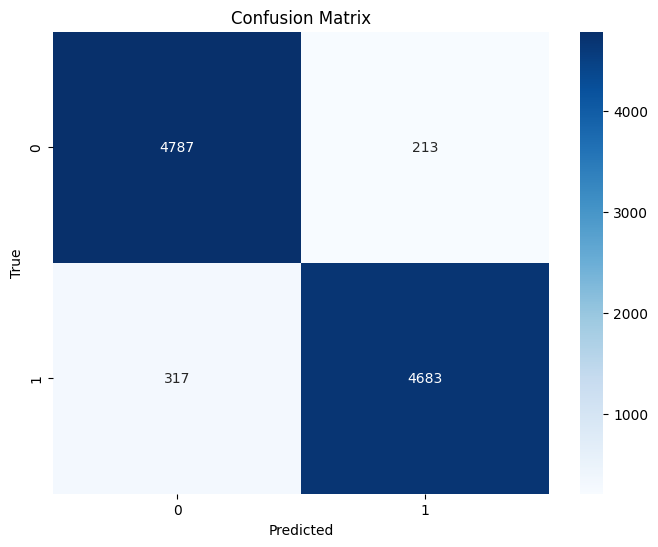

              precision    recall  f1-score   support

        Star       0.94      0.96      0.95      5000
      Galaxy       0.96      0.94      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Test Accuracy: 0.8920999765396118, Test Loss: 0.32778340578079224


In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Star', 'Galaxy'])
print(report)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

## Training 7 13 16 Testing 10

In [13]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, concatenate, ReLU, AveragePooling2D


# Function to load data and labels
def load_data_and_labels(sector_number):
    
    base_path = f'/kaggle/input/sector{sector_number}'
    galaxy_folder = os.path.join(base_path, 'Augmented_Galaxy_Images', 'Augmented_Galaxy_Images')
    star_folder = os.path.join(base_path, 'Augmented_Star_Images', 'Augmented_Star_Images')
    
    # Adjust file names based on sector
    if sector_number == 16:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 10:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}_200.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}_200.csv')
    elif sector_number == 7:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 13:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'star_s{sector_number}.csv')

    # Load metadata from CSV files to ensure correct labeling
    galaxy_metadata = pd.read_csv(galaxy_csv, skiprows=1)
    star_metadata = pd.read_csv(star_csv, skiprows=1)

    images = []
    labels = []  # 0 for star, 1 for galaxy

    def extract_objid(filename):
        return filename.split('_')[-1].split('.')[0]

    for file in os.listdir(galaxy_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(galaxy_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(galaxy_folder, file))
                images.append(img)
                labels.append(1)

    for file in os.listdir(star_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(star_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(star_folder, file))
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load data from training sectors (7 and 10)
images16, labels16 = load_data_and_labels(16)
images7, labels7 = load_data_and_labels(7)
images13, labels13 = load_data_and_labels(13)

# Combine the data from the two training sectors
X_train = np.concatenate((images7, images16, images13))
y_train = np.concatenate((labels7, labels16, labels13))

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
inp_layer = tf.keras.Input(shape=X_train.shape[1:])

# Initial Convolutional Layer
mod = Conv2D(filters=64, kernel_size=(5, 5), padding='same')(inp_layer)
mod = ReLU()(mod)

# mod = AveragePooling2D(pool_size=(2, 2), strides=2)(mod)

c1 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c1 = ReLU()(c1)
c2 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c2 = ReLU()(c2)
c3 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c3 = ReLU()(c3)
c4 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(c1)
c4 = ReLU()(c4)
c5 = Conv2D(filters=64, kernel_size=(3,3), padding='same')(c1)
c5 = ReLU()(c5)
c6 = Conv2D(filters=64, kernel_size=(5,5), padding='same')(c2)
c6 = ReLU()(c6)
p1 = AveragePooling2D(pool_size=(1, 1))(c3)
mod = concatenate([c4,c5,c6,p1])

c7 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c7 = ReLU()(c7)
c8 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c8 = ReLU()(c8)
c9 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c9 = ReLU()(c9)
c10 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(c7)
c10 = ReLU()(c10)
c11 = Conv2D(filters=92, kernel_size=(3,3), padding='same')(c7)
c11 = ReLU()(c11)
c12 = Conv2D(filters=92, kernel_size=(5,5), padding='same')(c8)
c12 = ReLU()(c12)
p2 = AveragePooling2D(pool_size=(1, 1))(c9)
mod = concatenate([c10,c11,c12,p2])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c13 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c13 = ReLU()(c13)
c14 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c14 = ReLU()(c14)
c15 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c15 = ReLU()(c15)
c16 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c13)
c16 = ReLU()(c16)
c17 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c13)
c17 = ReLU()(c17)
c18 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c14)
c18 = ReLU()(c18)
p3 = AveragePooling2D(pool_size=(1, 1))(c15)
mod = concatenate([c16,c17,c18,p3])

c19 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c19 = ReLU()(c19)
c20 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c20 = ReLU()(c20)
c21 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c21 = ReLU()(c21)
c22 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c19)
c22 = ReLU()(c22)
c23 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c19)
c23 = ReLU()(c23)
c24 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c20)
c24 = ReLU()(c24)
p4 = AveragePooling2D(pool_size=(1, 1))(c21)
mod = concatenate([c22,c23,c24,p4])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c25 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c25 = ReLU()(c25)
c26 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c26 = ReLU()(c26)
c27 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(mod)
c27 = ReLU()(c27)
c28 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c25)
c28 = ReLU()(c28)
p5 = AveragePooling2D(pool_size=(1, 1))(c26)
mod = concatenate([c27,c28,p5])
# Flatten before feeding into Dense layers
mod = Flatten()(mod)

# Dense layers
mod = Dense(1024, activation='relu')(mod)
mod = Dense(1024, activation='relu')(mod)

# Output layer for binary classification
out_layer = Dense(1, activation="sigmoid")(mod)
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)

# Compile the model for binary classification
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()
# Ensure labels are in the correct shape for binary_crossentropy
y_train = y_train.flatten()
y_val = y_val.flatten()

# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Load test data from sector 16
X_test, y_test = load_data_and_labels(10)
y_test = y_test.flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 45, 45, 5)]          0         []                            
                                                                                                  
 conv2d_145 (Conv2D)         (None, 45, 45, 64)           8064      ['input_6[0][0]']             
                                                                                                  
 re_lu_145 (ReLU)            (None, 45, 45, 64)           0         ['conv2d_145[0][0]']          
                                                                                                  
 conv2d_146 (Conv2D)         (None, 45, 45, 48)           3120      ['re_lu_145[0][0]']           
                                                                                            

313/313 [==============================] - 7s 22ms/step


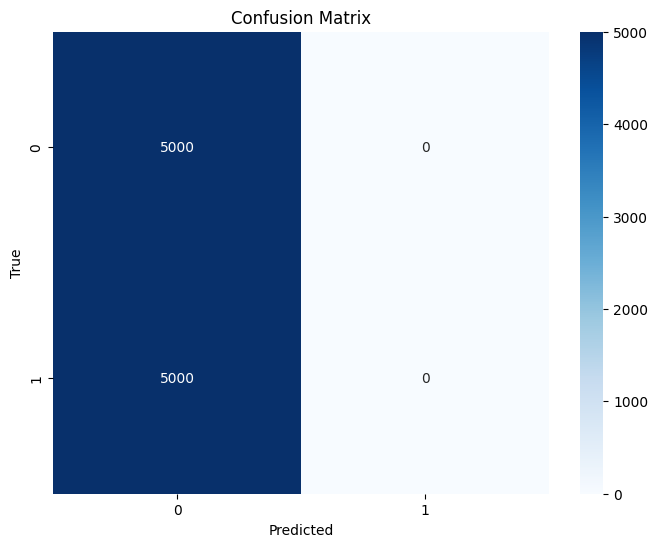

              precision    recall  f1-score   support

        Star       0.50      1.00      0.67      5000
      Galaxy       0.00      0.00      0.00      5000

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000

Test Accuracy: 0.5, Test Loss: 0.6931610107421875


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Star', 'Galaxy'])
print(report)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

## Training 7 10 16 Testing 13

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Dense, Flatten, concatenate, ReLU, AveragePooling2D


# Function to load data and labels
def load_data_and_labels(sector_number):
    
    base_path = f'/kaggle/input/sector{sector_number}'
    galaxy_folder = os.path.join(base_path, 'Augmented_Galaxy_Images', 'Augmented_Galaxy_Images')
    star_folder = os.path.join(base_path, 'Augmented_Star_Images', 'Augmented_Star_Images')
    
    # Adjust file names based on sector
    if sector_number == 16:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 10:
        galaxy_csv = os.path.join(base_path, f'galaxys_s{sector_number}_200.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}_200.csv')
    elif sector_number == 7:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'stars_s{sector_number}.csv')
    elif sector_number == 13:
        galaxy_csv = os.path.join(base_path, f'galaxy_s{sector_number}.csv')
        star_csv = os.path.join(base_path, f'star_s{sector_number}.csv')

    # Load metadata from CSV files to ensure correct labeling
    galaxy_metadata = pd.read_csv(galaxy_csv, skiprows=1)
    star_metadata = pd.read_csv(star_csv, skiprows=1)

    images = []
    labels = []  # 0 for star, 1 for galaxy

    def extract_objid(filename):
        return filename.split('_')[-1].split('.')[0]

    for file in os.listdir(galaxy_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(galaxy_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(galaxy_folder, file))
                images.append(img)
                labels.append(1)

    for file in os.listdir(star_folder):
        if file.endswith('.npy'):
            objid = extract_objid(file)
            if any(star_metadata['objid'].astype(str) == objid):
                img = np.load(os.path.join(star_folder, file))
                images.append(img)
                labels.append(0)

    return np.array(images), np.array(labels)

# Load data from training sectors (7 and 10)
images16, labels16 = load_data_and_labels(16)
images10, labels10 = load_data_and_labels(10)
images7, labels7 = load_data_and_labels(7)

# Combine the data from the two training sectors
X_train = np.concatenate((images7, images10, images16))
y_train = np.concatenate((labels7, labels10, labels16))

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model
inp_layer = tf.keras.Input(shape=X_train.shape[1:])

# Initial Convolutional Layer
mod = Conv2D(filters=64, kernel_size=(5, 5), padding='same')(inp_layer)
mod = ReLU()(mod)

# mod = AveragePooling2D(pool_size=(2, 2), strides=2)(mod)

c1 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c1 = ReLU()(c1)
c2 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c2 = ReLU()(c2)
c3 = Conv2D(filters=48, kernel_size=(1,1), padding='same')(mod)
c3 = ReLU()(c3)
c4 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(c1)
c4 = ReLU()(c4)
c5 = Conv2D(filters=64, kernel_size=(3,3), padding='same')(c1)
c5 = ReLU()(c5)
c6 = Conv2D(filters=64, kernel_size=(5,5), padding='same')(c2)
c6 = ReLU()(c6)
p1 = AveragePooling2D(pool_size=(1, 1))(c3)
mod = concatenate([c4,c5,c6,p1])

c7 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c7 = ReLU()(c7)
c8 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c8 = ReLU()(c8)
c9 = Conv2D(filters=64, kernel_size=(1,1), padding='same')(mod)
c9 = ReLU()(c9)
c10 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(c7)
c10 = ReLU()(c10)
c11 = Conv2D(filters=92, kernel_size=(3,3), padding='same')(c7)
c11 = ReLU()(c11)
c12 = Conv2D(filters=92, kernel_size=(5,5), padding='same')(c8)
c12 = ReLU()(c12)
p2 = AveragePooling2D(pool_size=(1, 1))(c9)
mod = concatenate([c10,c11,c12,p2])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c13 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c13 = ReLU()(c13)
c14 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c14 = ReLU()(c14)
c15 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c15 = ReLU()(c15)
c16 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c13)
c16 = ReLU()(c16)
c17 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c13)
c17 = ReLU()(c17)
c18 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c14)
c18 = ReLU()(c18)
p3 = AveragePooling2D(pool_size=(1, 1))(c15)
mod = concatenate([c16,c17,c18,p3])

c19 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c19 = ReLU()(c19)
c20 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c20 = ReLU()(c20)
c21 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c21 = ReLU()(c21)
c22 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(c19)
c22 = ReLU()(c22)
c23 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c19)
c23 = ReLU()(c23)
c24 = Conv2D(filters=128, kernel_size=(5,5), padding='same')(c20)
c24 = ReLU()(c24)
p4 = AveragePooling2D(pool_size=(1, 1))(c21)
mod = concatenate([c22,c23,c24,p4])
mod = AveragePooling2D(pool_size=(2, 2))(mod)

c25 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c25 = ReLU()(c25)
c26 = Conv2D(filters=92, kernel_size=(1,1), padding='same')(mod)
c26 = ReLU()(c26)
c27 = Conv2D(filters=128, kernel_size=(1,1), padding='same')(mod)
c27 = ReLU()(c27)
c28 = Conv2D(filters=128, kernel_size=(3,3), padding='same')(c25)
c28 = ReLU()(c28)
p5 = AveragePooling2D(pool_size=(1, 1))(c26)
mod = concatenate([c27,c28,p5])
# Flatten before feeding into Dense layers
mod = Flatten()(mod)

# Dense layers
mod = Dense(1024, activation='relu')(mod)
mod = Dense(1024, activation='relu')(mod)

# Output layer for binary classification
out_layer = Dense(1, activation="sigmoid")(mod)
model = tf.keras.Model(inputs=inp_layer, outputs=out_layer)

# Compile the model for binary classification
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()
# Ensure labels are in the correct shape for binary_crossentropy
y_train = y_train.flatten()
y_val = y_val.flatten()

# Train the CNN
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_data=(X_val, y_val),
    batch_size=32
)

# Load test data from sector 16
X_test, y_test = load_data_and_labels(13)
y_test = y_test.flatten()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 45, 45, 5)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 45, 45, 64)           8064      ['input_1[0][0]']             
                                                                                                  
 re_lu (ReLU)                (None, 45, 45, 64)           0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 45, 45, 48)           3120      ['re_lu[0][0]']               
                                                                                              

313/313 [==============================] - 7s 23ms/step


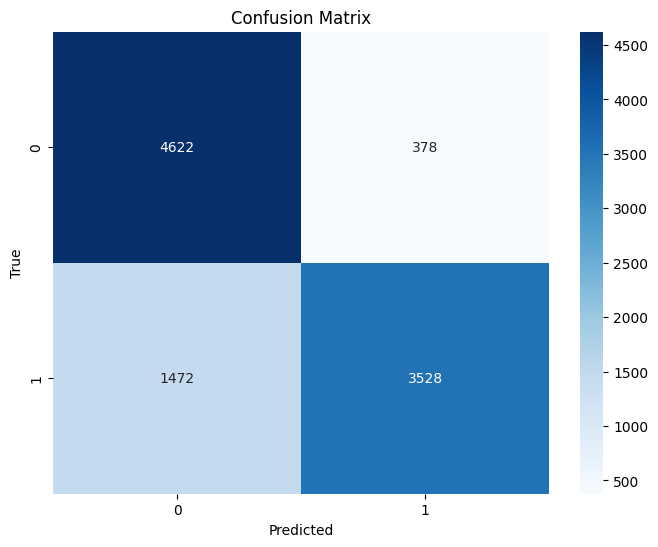

              precision    recall  f1-score   support

        Star       0.76      0.92      0.83      5000
      Galaxy       0.90      0.71      0.79      5000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000

Test Accuracy: 0.8149999976158142, Test Loss: 0.4650215804576874


In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Star', 'Galaxy'])
print(report)
print(f"Test Accuracy: {test_accuracy}, Test Loss: {test_loss}")